# Analyse descriptive

Regarder la différence de vocabulaires entre les sites de fakenews et les sites fiables

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd 
import pickle

import re
import scattertext as sc

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

In [3]:
%cd ../../data

C:\Users\ManonRICHARD\Documents\PFE\twitter-fakenews\data


### Import des données

#### Sites

In [ ]:
decodex_data = pd.read_csv("twitter_accounts_decodex.csv", sep=";")

decodex_data['path_website'] = decodex_data['path_website'].apply(lambda txt : re.sub('twitter.(com|fr)/', '', txt))
decodex_data['path_website'] = decodex_data['path_website'].apply(lambda txt : re.sub(r'\?lang=fr', '', txt))

decodex_data.head()

In [ ]:
decodex_data.loc[decodex_data["path_website"]=="wikiHow"]

#### Données tweet

In [6]:
with open("tweets_all_accounts.txt", "rb") as file :   
    tweets_all_accounts = pickle.load(file)

In [ ]:
tweets_all_accounts.head()

In [8]:
len(tweets_all_accounts)

1020089

In [9]:
len(tweets_all_accounts.loc[tweets_all_accounts['user']=="covid_infos"])

271

In [ ]:
tt = tweets_all_accounts.groupby("id").count().reset_index()
tt.loc[tt.user > 1]
#tweets_all_accounts.loc[tweets_all_accounts["id"]=="1000013862027038721"]
tweets_all_accounts.loc[tweets_all_accounts["id"]=="1000681833854636033"]

In [11]:
tweets_all_accounts = tweets_all_accounts.drop_duplicates(["id"])
# je pense que des doublons ce sont créés à cause des rate limit reached, wait for ... 
# car l'algo semble reprendre la récupération du début 

In [12]:
tweets_all_accounts.id.describe()

count                  924807
unique                 924807
top       1459580807790665732
freq                        1
Name: id, dtype: object

In [13]:
len(tweets_all_accounts.loc[tweets_all_accounts["user"]=="Les_Repliques"])

2573

#### nombre de followers par user

In [14]:
df_followers_count = pd.read_csv("df_followers_count_by_user.csv", sep=";", encoding='UTF-8')

In [15]:
df_followers_count.head(3)

,screen_name,count_followers
0,france_soir,98322
1,ThierryRegenere,1967
2,emakrusi,46639


#### Jointure 

In [16]:
tweets_all_accounts = pd.merge(tweets_all_accounts, decodex_data, left_on="user", right_on="path_website")
tweets_all_accounts = pd.merge(tweets_all_accounts, df_followers_count, left_on="user", right_on="screen_name")

In [ ]:
tweets_all_accounts = tweets_all_accounts.drop(["path_website","twitter","screen_name","namelow","name"], axis=1)

In [ ]:
tweets_all_accounts.head(4)

In [19]:
tweets_all_accounts.id.describe()

count                  802703
unique                 802703
top       1459580807790665732
freq                        1
Name: id, dtype: object

In [20]:
with open("data_tweets.txt", "rb") as file :   
    tweets_all_accounts = pickle.load(file)

In [ ]:
tweets_all_accounts.head()

In [22]:
pd.set_option("max_colwidth", None)
tweets_all_accounts["tweet"].head()

0                                   🚨Le professeur Raoult écope d’un blâme de l’Ordre des médecins. Article à paraître sur https://t.co/ZHHIMMy5I6
1                                                                                                                   RT @DIVIZIO1: Recours déposé !
2    🎙BEST OF - Pr Michel Drancourt : IHU, épidémies d'hier et d'aujourd'hui\nComment la "paléomicrobiologie" permet d'ac… https://t.co/6360Sgv9qJ
3     📚 Jonathan Curiel, directeur général adjoint des programmes des chaînes M6, W9 et 6ter, a publié en octobre 2021 so… https://t.co/wrnClfvtFW
4                                                        🖍 Le dessin du jour\n&gt; à retrouver sur https://t.co/08c1W3ouuM https://t.co/L3AcXkkb7d
Name: tweet, dtype: object

### Analyse descriptive

In [23]:
# Check for NAs
tweets_all_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926188 entries, 0 to 926187
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   user_id           926188 non-null  int64              
 1   user_screen_name  926188 non-null  object             
 2   id_tweet          926188 non-null  object             
 3   created_at        926188 non-null  datetime64[ns, UTC]
 4   tweet             926188 non-null  object             
 5   retweet_count     926188 non-null  int64              
 6   favorite_count    926188 non-null  int64              
 7   liability         926188 non-null  int64              
 8   description       926188 non-null  object             
 9   liability_label   926188 non-null  object             
 10  count_followers   926188 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 84.8+ MB


In [24]:
tweets_all_accounts['favorite_count'] = tweets_all_accounts['favorite_count'].astype('int')
tweets_all_accounts['retweet_count'] = tweets_all_accounts['retweet_count'].astype('int')

In [25]:
# Nombre de comptes twitter effectivement récupérés par label
tweets_all_accounts.groupby(["liability_label"]).user_id.nunique()

liability_label
site parodique                                              31
site qui diffuse régulièrement de la fausse information     52
site réputé fiable                                         201
site à la fiabilité douteuse                                39
Name: user_id, dtype: int64

In [26]:
# Nombre de tweets par label 
tweets_all_accounts.groupby(["liability_label"]).id_tweet.size()

liability_label
site parodique                                              51506
site qui diffuse régulièrement de la fausse information    133675
site réputé fiable                                         632999
site à la fiabilité douteuse                               108008
Name: id_tweet, dtype: int64

In [27]:
557943/201 #2776 tweet / sites fiables
109697/52 # 2109 tweet/sites qui diffuse souvent fake news
88570/39 # 2271 tweet / sites fiabilité douteuse

2271.025641025641

In [28]:
# Nombre de followers par label 
tweets_all_accounts.groupby(["liability_label"]).count_followers.describe()

,count,mean,std,min,25%,50%,75%,max
liability_label,,,,,,,,
site parodique,51506.0,1.805856e+05,3.561316e+05,18.0,6376.0,26952.0,147411.0,1347330.0
site qui diffuse régulièrement de la fausse information,133675.0,2.745449e+04,4.904187e+04,3.0,2349.0,7523.0,27526.0,258276.0
site réputé fiable,632999.0,1.938326e+06,6.318569e+06,119.0,53505.0,224069.0,1228261.0,55502385.0
site à la fiabilité douteuse,108008.0,9.683503e+05,3.520828e+06,184.0,10281.0,26693.0,164065.0,20468144.0


323


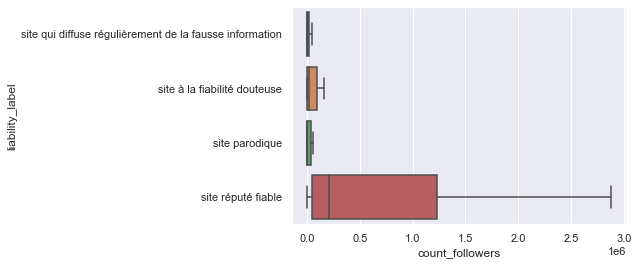

In [29]:
df_sites = tweets_all_accounts[["liability_label","user_screen_name", "count_followers"]].copy()
df_sites = df_sites.drop_duplicates()
print(len(df_sites))

sns.boxplot(data=df_sites, y="liability_label",x="count_followers", showfliers=False)
plt.show()

In [30]:
df_sites.groupby("liability_label").count_followers.describe()

,count,mean,std,min,25%,50%,75%,max
liability_label,,,,,,,,
site parodique,31.0,9.547826e+04,2.742276e+05,18.0,309.50,3060.0,36438.00,1347330.0
site qui diffuse régulièrement de la fausse information,52.0,2.297637e+04,4.562826e+04,3.0,779.25,5532.0,21271.75,258276.0
site réputé fiable,201.0,1.973150e+06,6.329455e+06,119.0,48184.00,209544.0,1228261.00,55502385.0
site à la fiabilité douteuse,39.0,8.261714e+05,3.310704e+06,184.0,5791.50,24070.0,97685.00,20468144.0


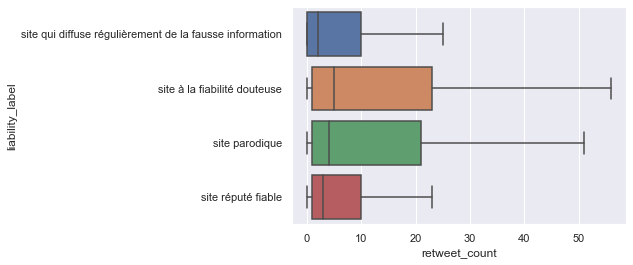

In [31]:
sns.boxplot(data=tweets_all_accounts, y="liability_label",x="retweet_count", showfliers=False)
plt.show()

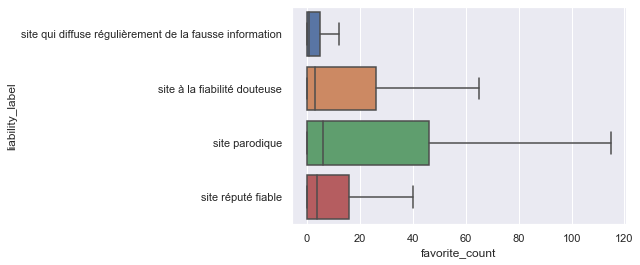

In [32]:
sns.boxplot(data=tweets_all_accounts, y="liability_label",x="favorite_count", showfliers=False)
plt.show()

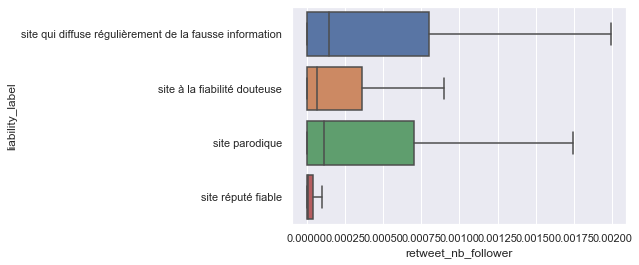

In [33]:
tweets_all_accounts["retweet_nb_follower"] = tweets_all_accounts["retweet_count"] / tweets_all_accounts["count_followers"]

sns.boxplot(data=tweets_all_accounts, y="liability_label",x="retweet_nb_follower", showfliers=False)
plt.show()

In [34]:
tweets_all_accounts.groupby(["liability_label"])[["count_followers"]].describe()

count_followers  \
                                                                  count   
liability_label                                                           
site parodique                                                  51506.0   
site qui diffuse régulièrement de la fausse information        133675.0   
site réputé fiable                                             632999.0   
site à la fiabilité douteuse                                   108008.0   

                                                                       \
                                                                 mean   
liability_label                                                         
site parodique                                           1.805856e+05   
site qui diffuse régulièrement de la fausse information  2.745449e+04   
site réputé fiable                                       1.938326e+06   
site à la fiabilité douteuse                             9.683503e+05   

                                                                              \
                                                                  std    min   
liability_label                                                                
site parodique                                           3.561316e+05   18.0   
site qui diffuse régulièrement de la fausse information  4.904187e+04    3.0   
site réputé fiable                                       6.318569e+06  119.0   
site à la fiabilité douteuse                             3.520828e+06  184.0   

                                                                            \
                                                             25%       50%   
liability_label                                                              
site parodique                                            6376.0   26952.0   
site qui diffuse régulièrement de la fausse information   2349.0    7523.0   
site réputé fiable                                       53505.0  224069.0   
site à la fiabilité douteuse                             10281.0   26693.0   

                                                                                
                                                               75%         max  
liability_label                                                                 
site parodique                                            147411.0   1347330.0  
site qui diffuse régulièrement de la fausse information    27526.0    258276.0  
site réputé fiable                                       1228261.0  55502385.0  
site à la fiabilité douteuse                              164065.0  20468144.0

In [35]:
tweets_all_accounts.groupby(["liability_label"])[["retweet_count"]].describe()

retweet_count  \
                                                                count   
liability_label                                                         
site parodique                                                51506.0   
site qui diffuse régulièrement de la fausse information      133675.0   
site réputé fiable                                           632999.0   
site à la fiabilité douteuse                                 108008.0   

                                                                     \
                                                               mean   
liability_label                                                       
site parodique                                            83.244612   
site qui diffuse régulièrement de la fausse information  145.417071   
site réputé fiable                                        56.781439   
site à la fiabilité douteuse                             118.523952   

                                                                            \
                                                                  std  min   
liability_label                                                              
site parodique                                            1790.218766  0.0   
site qui diffuse régulièrement de la fausse information  10639.520413  0.0   
site réputé fiable                                        3328.670905  0.0   
site à la fiabilité douteuse                              1825.821758  0.0   

                                                                         \
                                                         25%  50%   75%   
liability_label                                                           
site parodique                                           1.0  4.0  21.0   
site qui diffuse régulièrement de la fausse information  0.0  2.0  10.0   
site réputé fiable                                       1.0  3.0  10.0   
site à la fiabilité douteuse                             1.0  5.0  23.0   

                                                                    
                                                               max  
liability_label                                                     
site parodique                                            355426.0  
site qui diffuse régulièrement de la fausse information  3851676.0  
site réputé fiable                                       2053424.0  
site à la fiabilité douteuse                              233813.0

In [36]:
tweets_all_accounts.groupby(["liability_label","liability"]).size()

liability_label                                          liability
site parodique                                           1             51506
site qui diffuse régulièrement de la fausse information  2            133675
site réputé fiable                                       4            632999
site à la fiabilité douteuse                             3            108008
dtype: int64

In [37]:
def visualize_count_favorites(df, label_liability) : 
  
    ''' Cette fonction permet de visualiser le nombre de favoris et de retweets 
    sur toute la période pour un user_id donné '''

    df_temp = df.loc[df["liability"] == label_liability]
    ylabels = ["favorite_count", "retweet_count"]

    print("Représentation des nombres de retweets et de favoris de chaque tweet de {} par date".format(label_liability))
    fig = plt.figure(figsize=(13,3))
    fig.subplots_adjust(hspace=0.01,wspace=0.01)
    
    n_row = len(ylabels)
    n_col = 1
    for count, ylabel in enumerate(ylabels):
        ax = fig.add_subplot(n_row, n_col, count + 1)
        ax.plot(df_temp["created_at"], df_temp[ylabel])
        ax.set_ylabel(ylabel)
      
    plt.show()

Représentation des nombres de retweets et de favoris de chaque tweet de 1 par date


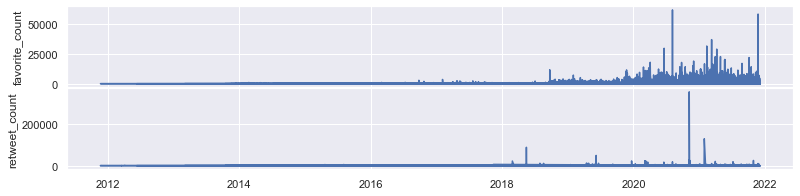

Représentation des nombres de retweets et de favoris de chaque tweet de 2 par date


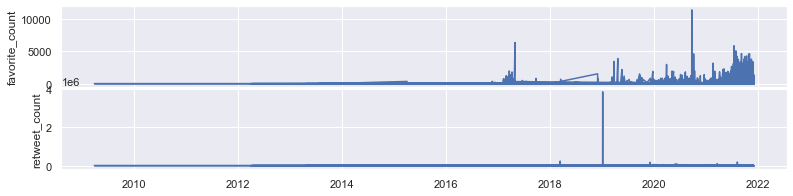

Représentation des nombres de retweets et de favoris de chaque tweet de 3 par date


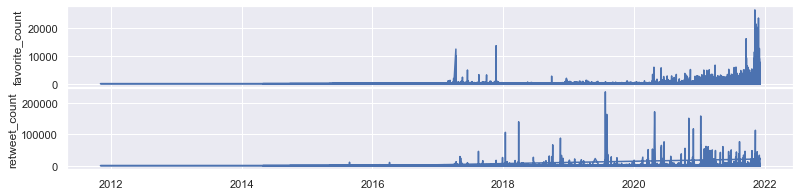

Représentation des nombres de retweets et de favoris de chaque tweet de 4 par date


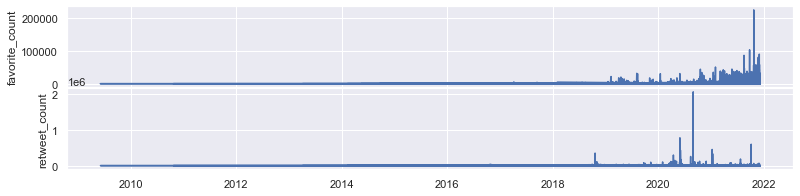

In [38]:
visualize_count_favorites(tweets_all_accounts, 1)
visualize_count_favorites(tweets_all_accounts, 2)
visualize_count_favorites(tweets_all_accounts, 3)
visualize_count_favorites(tweets_all_accounts, 4)

In [39]:
# Calcul d'une variable contenant le nombre de mots de chaque tweets
tweets_all_accounts["lenght_tweet"] = tweets_all_accounts["tweet"].apply(lambda tweet : len(tweet.split()))

# Calcul de la distribution de la variable pour chaque politique
tweets_all_accounts.groupby(["liability_label"]).lenght_tweet.describe()

,count,mean,std,min,25%,50%,75%,max
liability_label,,,,,,,,
site parodique,51506.0,14.954724,5.350026,1.0,12.0,16.0,19.0,34.0
site qui diffuse régulièrement de la fausse information,133675.0,14.963097,5.632404,1.0,11.0,15.0,19.0,34.0
site réputé fiable,632999.0,16.333105,4.965509,1.0,13.0,17.0,20.0,49.0
site à la fiabilité douteuse,108008.0,15.700115,5.395326,1.0,12.0,16.0,20.0,33.0


In [40]:
def print_famous_tweets(df, liability, nb_favorites) :

    ''' Cette fonction permet de sélectionner les tweets qui ont eu le plus de favoris 
    pour un label donné, et de lire le tweet avec les indicateurs des autres variables de la 
    base de données  
    '''

    df_sub = df.loc[(df.liability==liability) & (df.favorite_count > nb_favorites),:]
    for irow in range(df_sub.shape[0]):
        df_row = df_sub.iloc[irow,:]
    
        print(df_row["created_at"])
        print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
        print(df_row["tweet"])
        print("\n")

In [41]:
print_famous_tweets(tweets_all_accounts, 1, 20000)

2021-03-30 08:15:00+00:00
favorite_count= 22412 retweet_count=  5765
🔴 COVID-19 : Emmanuel Macron aurait regardé l’intégralité des épisodes de la série « Il était une fois... la Vie. »… https://t.co/htXCzrLHaq


2021-10-04 17:34:40+00:00
favorite_count= 21729 retweet_count=  6225
Fuentes de Facebook confirman que le habían advertido a Mark Zuckerberg no contratar a Centros Poblados. https://t.co/AT3C3JqOmS


2021-05-22 14:47:05+00:00
favorite_count= 20185 retweet_count=  6874
#Exclusivo!!! @IvanDuque se confiesa https://t.co/EnsknfgDhw


2021-04-28 14:50:39+00:00
favorite_count= 22533 retweet_count=  6132
Derriban estatua de Botero tras confundirla con estatua de ⁦Iván Duque. https://t.co/cwx36bs2RB


2020-08-04 19:39:06+00:00
favorite_count= 61398 retweet_count= 18363
ICBF asumirá custodia de Iván Duque.


2020-06-19 15:04:32+00:00
favorite_count= 29457 retweet_count= 10161
Con éxito arrancó el Covid Friday en grandes almacenes de Colombia.


2021-11-23 15:43:32+00:00
favorite_count= 